In [1]:
import numpy as np
import sys
import scipy.io as sio
import os
import operator
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
base_dir = '/data/amnh/darwin/'
base_image_dir = base_dir + 'images/'

In [3]:
fft_norms = pd.read_csv(base_dir + 'fft_norms.csv', index_col=False, header=None, sep='\t');
fft_norms.columns = ["image1", "fft"]
fft_norms.drop(fft_norms.index[:10], inplace=True)
fft_norms.head(10)

image1          fft
10        MS-DAR-00107-000-00114_south_fft.mat  7770.200661
11  MS-DAR-00209-00009-000-00055_south_fft.mat  7141.830477
12        MS-DAR-00107-000-00112_south_fft.mat  6860.266081
13  MS-DAR-00209-00014-000-00189_north_fft.mat  6667.084564
14  MS-DAR-00157-00001-000-00354_south_fft.mat  6598.663240
15  MS-DAR-00053-00001-000-00499_south_fft.mat  5892.486597
16        MS-DAR-00107-000-00113_south_fft.mat  5578.295736
17        MS-DAR-00185-000-00625_north_fft.mat  5479.215678
18        MS-DAR-00190-000-00080_north_fft.mat  5308.091723
19  MS-DAR-00053-00002-000-00300_north_fft.mat  4942.169222

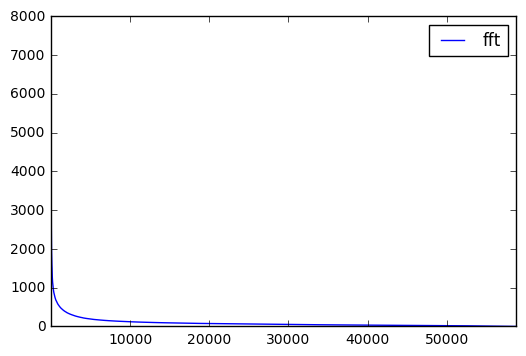

In [4]:
fft_norms.plot()
plt.show()

In [5]:
fft_top_matches = pd.read_csv(base_dir + 'top_items_sorted.txt', index_col=False, header=None, sep=' ');
fft_top_matches.columns = ["image1", "image2", "fft_score"]
fft_top_matches.head()

image1  \
0  MS-DAR-00015-00001-000-00206_south_fft.mat   
1  MS-DAR-00015-00001-000-00062_south_fft.mat   
2  MS-DAR-00015-00001-000-00205_south_fft.mat   
3  MS-DAR-00015-00001-000-00061_south_fft.mat   
4  MS-DAR-00015-00001-000-00206_north_fft.mat   

                                       image2  fft_score  
0  MS-DAR-00015-00001-000-00206_south_fft.mat        1.0  
1  MS-DAR-00015-00001-000-00206_south_fft.mat        1.0  
2  MS-DAR-00015-00001-000-00061_south_fft.mat        1.0  
3  MS-DAR-00015-00001-000-00061_south_fft.mat        1.0  
4  MS-DAR-00015-00001-000-00206_north_fft.mat        1.0

# The following is the list of most intersting matches

In [6]:
fft_top_interesting_matches = pd.merge(fft_norms, fft_top_matches, how='inner')
fft_top_interesting_matches.columns = ["image1","fft1","best_match","fft_score"]
fft_top_interesting_matches.sort_values(by=["fft1","fft_score"])
fft_top_interesting_matches.head()

image1         fft1  \
0  MS-DAR-00209-00009-000-00055_south_fft.mat  7141.830477   
1  MS-DAR-00157-00001-000-00354_south_fft.mat  6598.663240   
2        MS-DAR-00185-000-00625_north_fft.mat  5479.215678   
3  MS-DAR-00053-00001-000-00475_north_fft.mat  4459.332917   
4        MS-DAR-00016-000-00367_north_fft.mat  4411.741723   

                                   best_match  fft_score  
0        MS-DAR-00108-000-00387_north_fft.mat   0.951560  
1        MS-DAR-00003-000-00039_north_fft.mat   0.970432  
2        MS-DAR-00088-000-00160_south_fft.mat   0.995406  
3        MS-DAR-00080-000-00221_south_fft.mat   0.924635  
4  MS-DAR-00010-00001-000-00081_south_fft.mat   0.990656

In [7]:
# Sanity check: 
# we find the index of a known match
print(fft_top_interesting_matches.loc[fft_top_interesting_matches["image1"]=="MS-DAR-00084-00002-000-00307_north_fft.mat"])

                                         image1        fft1  \
658  MS-DAR-00084-00002-000-00307_north_fft.mat  544.006755   

                               best_match  fft_score  
658  MS-DAR-00085-000-00150_south_fft.mat   0.999843  


In [8]:
row_index = 658
image1_basename = fft_top_interesting_matches["image1"][row_index]
image2_basename = fft_top_interesting_matches["best_match"][row_index]
fft1_value = fft_top_interesting_matches["fft1"][row_index]
fft_score = fft_top_interesting_matches["fft_score"][row_index]
print(image1_basename, image2_basename, fft1_value, fft_score)
image1_filename = base_image_dir + image1_basename[:-14] + '.jpg'
image2_filename = base_image_dir + image2_basename[:-14] + '.jpg'

MS-DAR-00084-00002-000-00307_north_fft.mat MS-DAR-00085-000-00150_south_fft.mat 544.006754931 0.999843463608


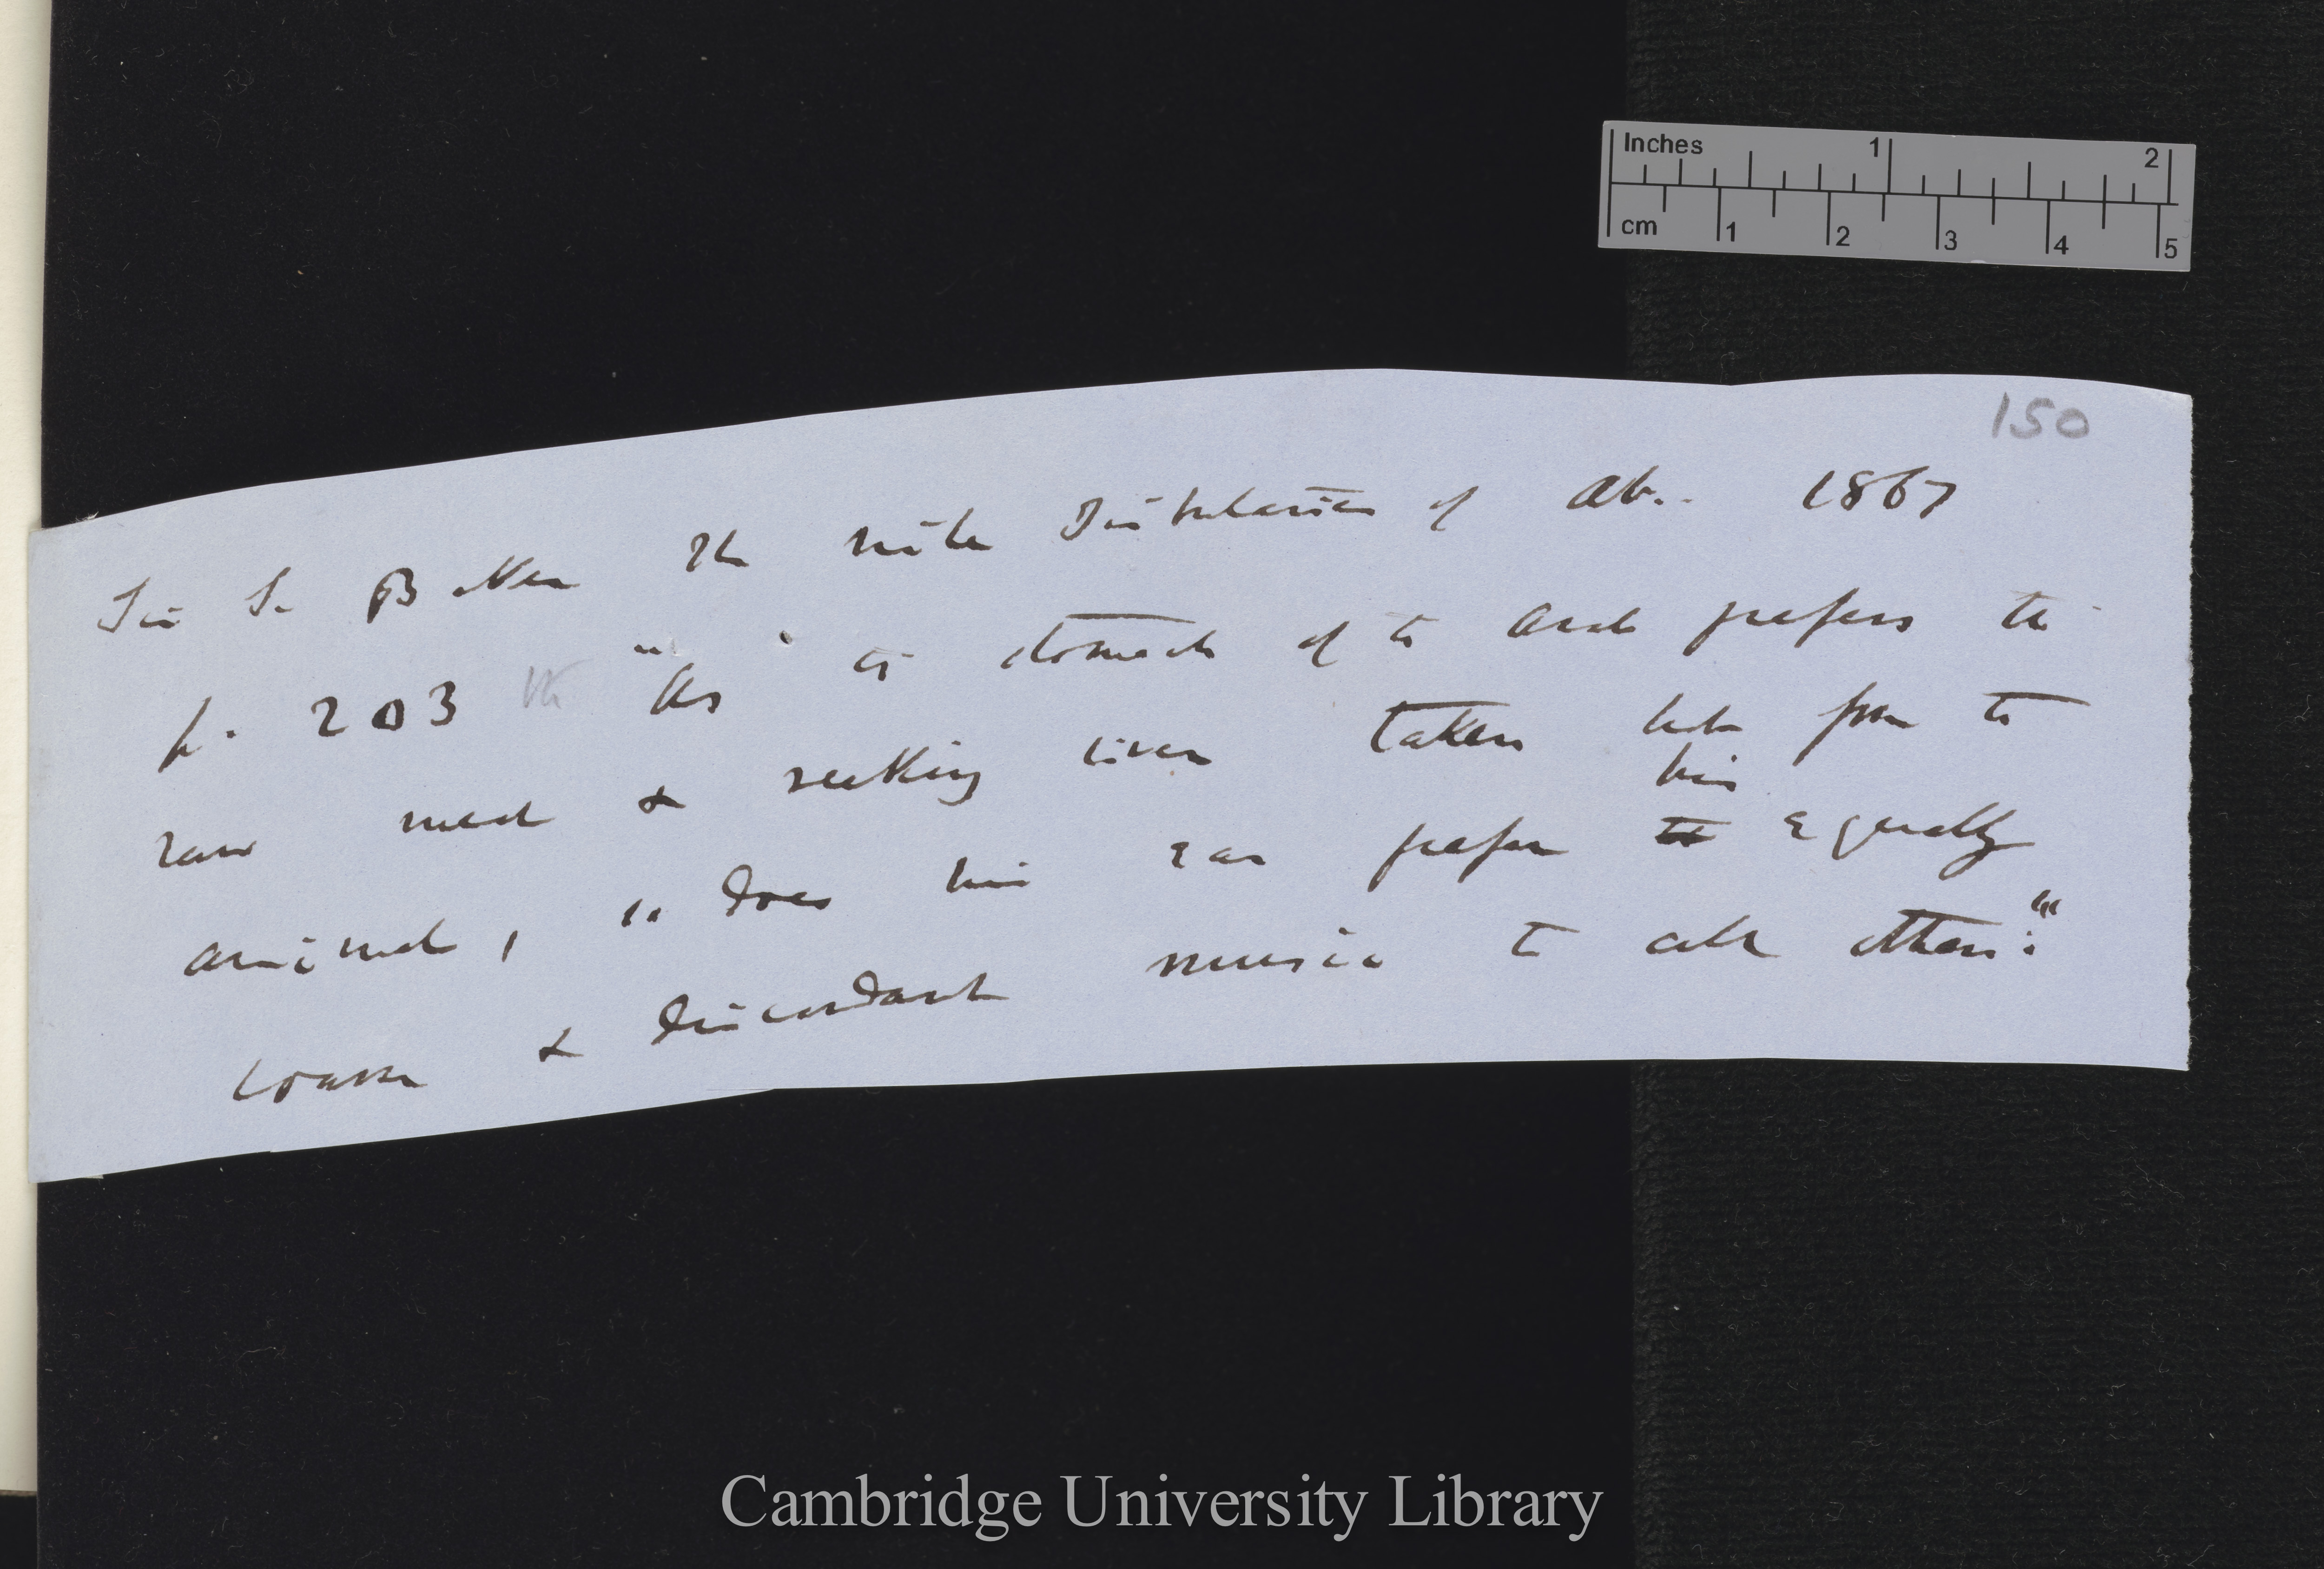

In [9]:
Image(filename=image1_filename, height=0.5)

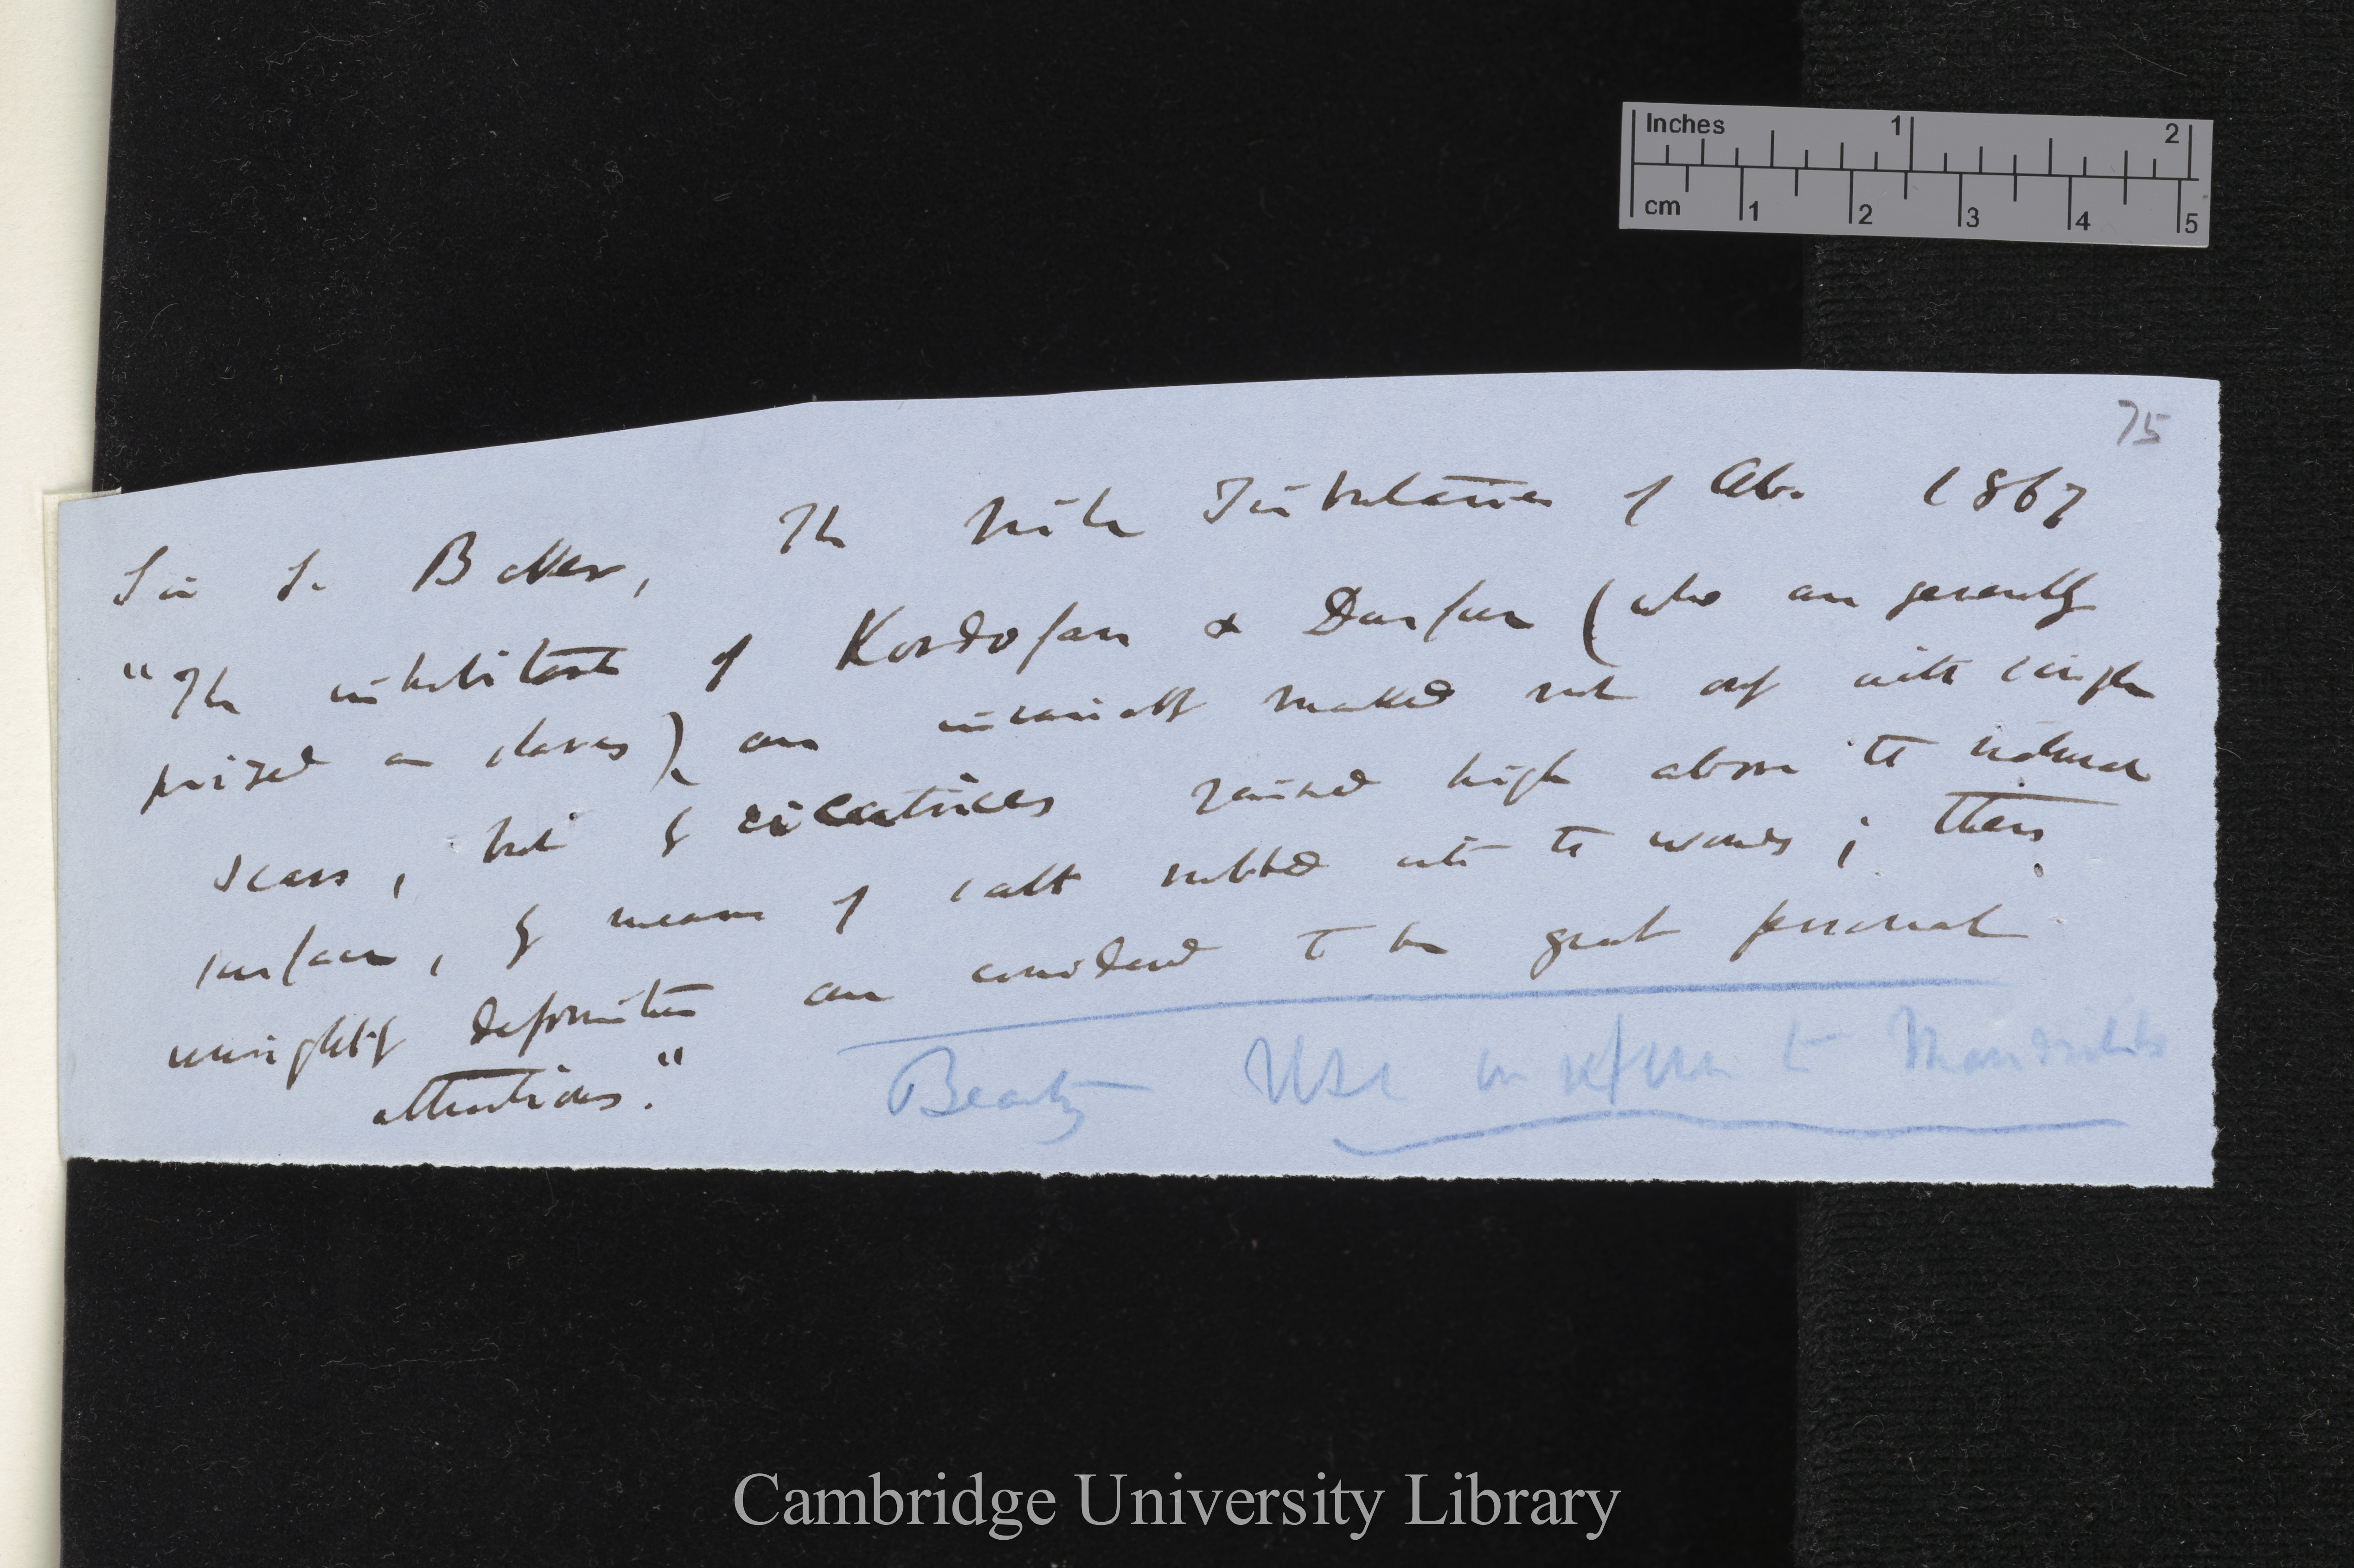

In [10]:
Image(filename=image2_filename)

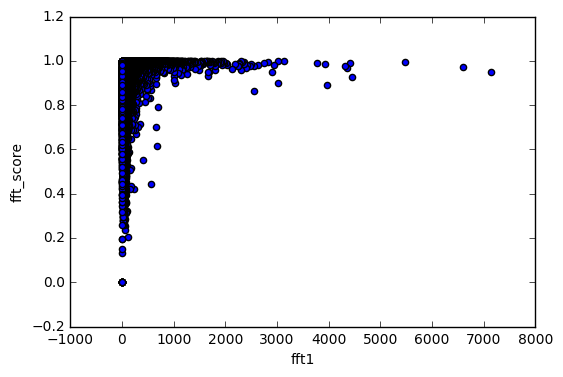

In [11]:
fft_top_interesting_matches.plot(kind='scatter', x='fft1', y='fft_score')
plt.show()